<a href="https://colab.research.google.com/github/Rogerio-mack/Machine-Learning-I/blob/main/ML7_ex_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# ***Título do seu projeto***
---

$\rightarrow$ **esta célula deve ser removida na entrega do projeto** 

# Objetivo

Neste trabalho você deve obrigatoriamente trabalhar em grupo de 2-4 alunos e desenvolver uma solução de aprendizado supervisionado para algum problema de interesse do grupo. Os problemas poderão ser de classificação ou de regressão. 

## Descrição do Projeto

O trabalho deve ser original e desenvolvido em R ou Python notebook com um conjunto de dados próprios e originais definidos. Entendam como dados próprios e originais dados que são originais de empresas ou entidades, podendo ser bases públicas. Dados de ONGs, empresas privadas ou governo, são exemplos de bases válidas. Bases de repositórios públicos como Kaggle e UCI, que fornecem bases prontas não são originais. Tenha em mente: você deve construir uma base de dados nova para o seu problema, é essa a ideia de dados originais. Se tiver dúvidas consulte o professor antes de empregar uma base.

Os dados devem suportar um problema relevante e adequado para o aprendizado supervisionado. Assim, não podem ser empregadas bases artificiais e problemas muito simples. Devem ser evitadas também Séries Temporais como séries financeiras (como ações) e de dados climáticos que requerem outras técnicas não detalhadas aqui.

As bases devem conter um mínimo de 1000 instâncias. Consulte o professor para uso de um número menor de instâncias para dados próprios de uma empresa por exemplo.

Você deve implementar ao menos dois modelos, comparar e discutir os seus resultados. Seu notebook deve ser 100% executável e incluir todo necessário para construção dos dados, entendimento do problema e da solução. 

Deve ainda ser entregue uma apresentação em **vídeo (até 5min)** dos resultados. 



$\rightarrow$ **esta célula deve ser removida na entrega do projeto** 

Siga este template para entrega do seu projeto. O código deste notebook precisa ser 100% executável, sem a necessidade de qualquer operação adicional como por exemplo a download, cópia ou alteração de arquivos. Crie assim repositórios públicos para suas bases de dados, por exemplo, disponibilizando-as no GitHub.

## Entregas na Tarefa do Moodle

1. Poste este Python notebook (.ipynb) modificado com o seu projeto.
2. Poste o endereço (link) do Python notebook do seu projeto compartilhado (público para leitura) nos comentários da tarefa
3. Um vídeo de até 5min com a apresentação do seu projeto em formato .mp4
4. Opcional, poste o .pptx da apresentação

## Vídeo

O vídeo deve contemplar:

1. Apresentação e Justificativa do seu problema
2. A abordagem dada ao problema (fonte dos dados, transformações, modelos avaliados)
3. A solução e seus resultados
4. Diferenciais e Melhorias Futuras do trabalho (modelos e técnicas diferenciadas que foram empregadas, limitações do modelo atual e como melhora-las etc.)







In [104]:
#@title Identificação do Grupo

#@markdown Integrantes do Grupo (*informe \<TIA\>,\<nome\>*)
Aluno1 = '10424880, Bruno Zovaro Nascimento' #@param {type:"string"} 
Aluno2 = '14023666, Douglas Novaes Dias' #@param {type:"string"}
Aluno3 = '10363757, Milan Mirco Moraes Mazur' #@param {type:"string"}
Aluno4 = '10416023, Paulo Cesar Masson Junior' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}


# **Apresentação**

# Problema

*Apresente resumidamente o trabalho justificando a escolha e a relevância do problema.*



Este projeto analisa um dataset de saúde, buscando prever a idade dos 
participantes com base em variáveis como hábitos alimentares e condições de 
saúde. Conseguimos analisar e correlacionar diversas variáveis de acordo com 
cada participante, tendo uma visão precisa da correlação com a idade. Além 
das tabelas, os gráficos nos permitirão ter uma visão mais concisa do que 
obtivemos com a análise. 
Os resultados revelam não apenas a precisão das previsões, mas também 
insights sobre como variáveis específicas se relacionam com a idade.

# Referencial Teórico

*Apresente aqui o referencial teórico empregado. Empregue as referências empregadas que devem aparecer no final do trabalho. Lembre-se, existem  referências técnicas do domínio da solução, mas também referências do domínio do problema (por exemplo, se estiver classificando reclamações de clientes, existem inúmeras referências sobre o problema de negócio em si).* 

https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

# Metodologia 

*Apresente e discuta a abordagem de solução empregada. Discuta os dados empregados, tratamento efetuados, variáveis preditoras e objetivo, técnicas empregadas.*



Utilizamos as técnicas de Logistic regression com grid search, Matriz de Confusão, Logistic regression com grid search usando F1-score como métrica, RandomForestClassifier.
Nosso principal objetivo é prever a idade dos participantes com base em variáveis como hábitos alimentares e condições de saúde

# Resultados

*Resuma aqui os resultados, principalmente incluindo tabelas e esquemas necessários.* 

Podemos observar que 84% da precisao dos dados referem-se a classe Adult, tendo um recall de 100% e f1-score de 91%

# **Implementação**

# Base de Dados 

*Descreva aqui os dados utilizados, discuta eventuais transformações e/ou seleções dos dados e preparações nos dados.* 




Importando as bibliotecas

In [105]:
from ucimlrepo import fetch_ucirepo 
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns

Coletando os datasets

In [106]:
pd.set_option('display.max_columns', None)
df_health = pd.read_csv('https://archive.ics.uci.edu/static/public/887/data.csv', sep=",", encoding='latin-1')

Exibindo os datasets puro

In [107]:
# fetch dataset 
national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887) 
  
# data (as pandas dataframes) 
X = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.features 
y = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.targets 
  
# metadata 
print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.metadata) 
  
# variable information 
print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.variables) 

{'uci_id': 887, 'name': 'National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset', 'repository_url': 'https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset', 'data_url': 'https://archive.ics.uci.edu/static/public/887/data.csv', 'abstract': "The National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC), collects extensive health and nutritional information from a diverse U.S. population. Though expansive, the dataset is often too broad for specific analytical purposes. In this sub-dataset, we narrow our focus to predicting respondents' age by extracting a subset of features from the larger NHANES dataset. These selected features include physiological measurements, lifestyle choices, and biochemical markers, which were hypothesized to have strong correlations with age.", 'area': 'Health and Medicine', 'tasks': ['Classifi

In [108]:
display(df_health.head(10))

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
5,73581.0,Adult,50.0,1.0,2.0,23.6,110.0,2.0,100.0,6.08
6,73587.0,Adult,14.0,1.0,2.0,38.7,94.0,2.0,202.0,21.11
7,73596.0,Adult,57.0,2.0,2.0,38.3,107.0,2.0,164.0,20.93
8,73607.0,Senior,75.0,1.0,2.0,38.9,89.0,2.0,113.0,17.47
9,73610.0,Adult,43.0,1.0,1.0,28.9,90.0,2.0,95.0,3.24


Tratamento da base

In [109]:
df_health = df_health.rename(columns={
    'SEQN': 'sk',
    'age_group': 'faixaEtaria',
    'RIDAGEYR': 'idade',
    'RIAGENDR': 'sexo',
    'PAQ605': 'exerciciosSemanais',
    'BMXBMI': 'imc',
    'LBXGLU': 'nivelGlicose',
    'DIQ010': 'diabetico',
    'LBXGLT': 'LBXGLT',
    'LBXIN': 'nivelInsulinaSangue'
})

In [110]:
display(df_health.head(10))

,sk,faixaEtaria,idade,sexo,exerciciosSemanais,imc,nivelGlicose,diabetico,LBXGLT,nivelInsulinaSangue
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
5,73581.0,Adult,50.0,1.0,2.0,23.6,110.0,2.0,100.0,6.08
6,73587.0,Adult,14.0,1.0,2.0,38.7,94.0,2.0,202.0,21.11
7,73596.0,Adult,57.0,2.0,2.0,38.3,107.0,2.0,164.0,20.93
8,73607.0,Senior,75.0,1.0,2.0,38.9,89.0,2.0,113.0,17.47
9,73610.0,Adult,43.0,1.0,1.0,28.9,90.0,2.0,95.0,3.24


In [111]:
# Verificacao de Dados ausentes
# Proporção de ausentes em cada atributo:
df_proporcao=df_health.isnull().sum()/len(df_health)
print(df_proporcao)

sk                     0.0
faixaEtaria            0.0
idade                  0.0
sexo                   0.0
exerciciosSemanais     0.0
imc                    0.0
nivelGlicose           0.0
diabetico              0.0
LBXGLT                 0.0
nivelInsulinaSangue    0.0
dtype: float64


In [112]:
# Criacao de um DataFrame pandas com o resultado da operacao isnull()
df_isnull = df_health.isnull()
# Contabilizacao dos dados ausentes por atributo
print(df_health.isnull().sum())

sk                     0
faixaEtaria            0
idade                  0
sexo                   0
exerciciosSemanais     0
imc                    0
nivelGlicose           0
diabetico              0
LBXGLT                 0
nivelInsulinaSangue    0
dtype: int64


In [113]:
# Verificacao de Linhas duplicadas
total_duplicados = df_health.duplicated(keep=False).sum()
print(f'Total de linhas duplicadas: {total_duplicados}')

Total de linhas duplicadas: 0


## **Modelo 1**

*Descreva resumidamente o modelo empregado.*


### **Modelo 1:** Preparação dos Dados


In [114]:
# Outliers
print(df_health.columns)
# Avaliacao de outiliers 
# Para calcular múltiplos quantis (ex: 0.25, 0.5, 0.75)
print('Coluna com mais correlação com Senior x Adult = LBXGLT:')
quantis_coluna=df_health['LBXGLT'].quantile([0.25, 0.5, 0.75])
print(quantis_coluna)
resumo_coluna=df_health['LBXGLT'].describe()
print(resumo_coluna)

Index(['sk', 'faixaEtaria', 'idade', 'sexo', 'exerciciosSemanais', 'imc',
       'nivelGlicose', 'diabetico', 'LBXGLT', 'nivelInsulinaSangue'],
      dtype='object')
Coluna com mais correlação com Senior x Adult = LBXGLT:
0.25     87.0
0.50    105.0
0.75    130.0
Name: LBXGLT, dtype: float64
count    2278.000000
mean      114.978929
std        47.061239
min        40.000000
25%        87.000000
50%       105.000000
75%       130.000000
max       604.000000
Name: LBXGLT, dtype: float64


### **Modelo 1:** Modelo


In [115]:
# Treinamento etc...
# define os atributos dependentes e independente:
X=df_health.drop(columns=['faixaEtaria', 'idade'])
y=df_health['faixaEtaria']

In [116]:
# define o scaler, prepara (aprende) e executa normalização
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

In [117]:
# Logistic regression com grid search:
base_estimator = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularização
    'penalty': ['l1', 'l2']         # Tipos de penalidade
}

In [118]:
# Configurando o GridSearchCV
clf = GridSearchCV(base_estimator, param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

### **Modelo 1:** Resultados


In [119]:
# Resultados
print("Melhores parâmetros:", clf.best_params_)
print("Acurácia no conjunto de teste:", clf.score(X_test, y_test))
print(clf.best_estimator_)
print('\nDetailed classification report:\n')
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Melhores parâmetros: {'C': 0.01, 'penalty': 'l1'}
Acurácia no conjunto de teste: 0.8406432748538012
LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')

Detailed classification report:

              precision    recall  f1-score   support

       Adult       0.84      1.00      0.91       575
      Senior       0.00      0.00      0.00       109

    accuracy                           0.84       684
   macro avg       0.42      0.50      0.46       684
weighted avg       0.71      0.84      0.77       684



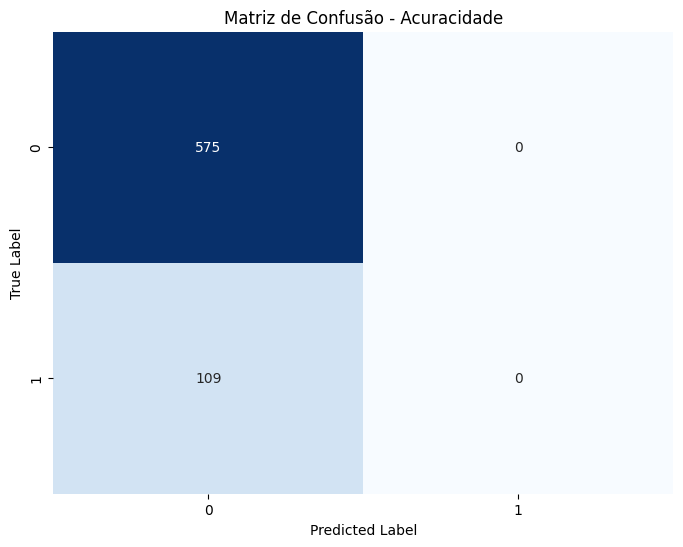

In [120]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
# Exibindo a matriz de confusão com Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusão - Acuracidade")
plt.show()

## **Modelo 2**

*Descreva resumidamente o modelo empregado.*


### **Modelo 2:** Preparação dos Dados


In [121]:
# Outliers
print(df_health.columns)
# Avaliacao de outiliers 
# Para calcular múltiplos quantis (ex: 0.25, 0.5, 0.75)
print('Coluna com mais correlação com Senior x Adult = LBXGLT:')
quantis_coluna=df_health['LBXGLT'].quantile([0.25, 0.5, 0.75])
print(quantis_coluna)
resumo_coluna=df_health['LBXGLT'].describe()
print(resumo_coluna)

Index(['sk', 'faixaEtaria', 'idade', 'sexo', 'exerciciosSemanais', 'imc',
       'nivelGlicose', 'diabetico', 'LBXGLT', 'nivelInsulinaSangue'],
      dtype='object')
Coluna com mais correlação com Senior x Adult = LBXGLT:
0.25     87.0
0.50    105.0
0.75    130.0
Name: LBXGLT, dtype: float64
count    2278.000000
mean      114.978929
std        47.061239
min        40.000000
25%        87.000000
50%       105.000000
75%       130.000000
max       604.000000
Name: LBXGLT, dtype: float64


### **Modelo 2:** Modelo


In [122]:
# Logistic regression com grid search usando F1-score como métrica
clf_f1 = GridSearchCV(base_estimator, param_grid, cv=5, scoring='f1_weighted')  # Alterado para f1_weighted
clf_f1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='f1_weighted')

### **Modelo 2:** Resultados


In [123]:
# Resultados
print("Melhores parâmetros com base no F1-score:", clf_f1.best_params_)
print("F1-score no conjunto de teste:", clf_f1.score(X_test, y_test))
print(clf_f1.best_estimator_)
print('\nDetailed classification report:\n')
y_pred_f1 = clf_f1.predict(X_test)
print(classification_report(y_test, y_pred_f1, zero_division=0))

Melhores parâmetros com base no F1-score: {'C': 0.01, 'penalty': 'l1'}
F1-score no conjunto de teste: 0.7678631978410415
LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')

Detailed classification report:

              precision    recall  f1-score   support

       Adult       0.84      1.00      0.91       575
      Senior       0.00      0.00      0.00       109

    accuracy                           0.84       684
   macro avg       0.42      0.50      0.46       684
weighted avg       0.71      0.84      0.77       684



In [124]:
# random forest:
    
rf = RandomForestClassifier(class_weight='balanced')  # Ajustar o peso das classes
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

clf_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_weighted')
clf_rf.fit(X_train, y_train)

print("Melhores parâmetros com base no F1-score:", clf_rf.best_params_)
print("F1-score no conjunto de teste:", clf_rf.score(X_test, y_test))

y_pred_rf = clf_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf, zero_division=0))

Melhores parâmetros com base no F1-score: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
F1-score no conjunto de teste: 0.811570317400474
              precision    recall  f1-score   support

       Adult       0.87      0.95      0.91       575
      Senior       0.48      0.22      0.30       109

    accuracy                           0.84       684
   macro avg       0.67      0.59      0.61       684
weighted avg       0.80      0.84      0.81       684



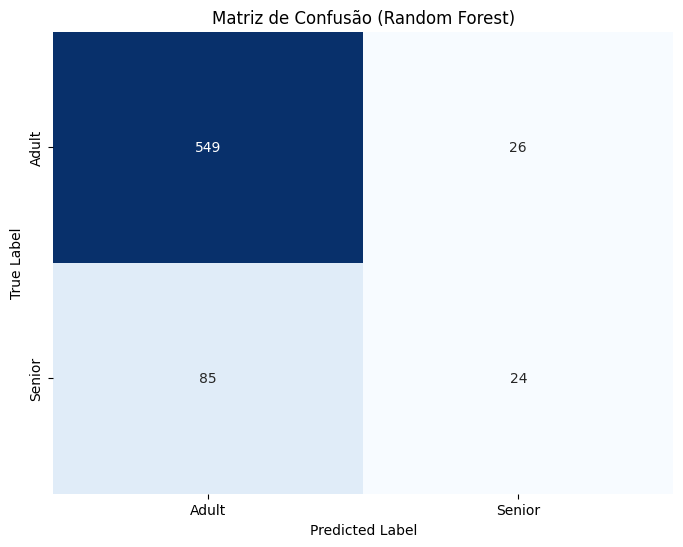

              precision    recall  f1-score   support

       Adult       0.87      0.95      0.91       575
      Senior       0.48      0.22      0.30       109

    accuracy                           0.84       684
   macro avg       0.67      0.59      0.61       684
weighted avg       0.80      0.84      0.81       684



In [125]:
# matriz de confusao no random forest
y_pred_rf = clf_rf.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Adult', 'Senior'], yticklabels=['Adult', 'Senior'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusão (Random Forest)")
plt.show()
# Relatório de classificação
print(classification_report(y_test, y_pred_rf, zero_division=0))

# **Conclusão** 

*Apresente a conclusão do seu estudo comparando ainda os resultados obtidos com o referencial teórico apresentado.*



Os resultados revelam não apenas a precisão das previsões, mas também 
insights sobre como variáveis específicas se relacionam com a idade.

# **Referências** 

*Indique as referências empregadas, incluindo as fontes de dados.*

https://dados.gov.br/dados/conjuntos-dados/volume-radar

---

In [126]:
#@title Avaliação
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown Projeto cumpre todos os itens pedidos. 
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As seleções de dados e eventos para análise são relevantes e justificados. 
Tecnicas = 6 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de empregadas são adequadas e corretamente aplicadas.
Apresentacao = 7 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva.
Analise = 8 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As premissas de análise se justificam e a analise é correta. 
Conclusao = 7 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados








In [127]:
#@markdown ### Nota Final
nota = Completo + Relevancia + Tecnicas + Apresentacao + Analise + Conclusao 

nota = nota / 6 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
alunos

Nota final do trabalho 8.3



,tia,nome,nota
0,10424880,BRUNO ZOVARO NASCIMENTO,8.3
1,14023666,DOUGLAS NOVAES DIAS,8.3
2,10363757,MILAN MIRCO MORAES MAZUR,8.3
3,10416023,PAULO CESAR MASSON JUNIOR,8.3
